## **Predicción de Precios de Viviendas para regiones en los Estados Unidos.**

Los datos contienen las siguientes columnas:

* 'Avg. Area Income': Ingreso promedio de los residentes de la ciudad donde se encuentra la casa.
* 'Avg. Area House Age': Edad promedio de las casas en la misma ciudad
* 'Avg. Area Number of Rooms': Número promedio de habitaciones para casas en la misma ciudad
* 'Avg. Area Number of Bedrooms': Número promedio de dormitorios para casas en la misma ciudad
* 'Area Population': Población de la ciudad donde se encuentra la casa
* 'Price': Precio al que se vendió la casa
* 'Address': Dirección de la casa

In [1]:
# importing librarires
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [2]:
# loading csv data to dataframe 
USA_Housing = pd.read_csv('data/USA_Housing.csv')
# checking out the Data
USA_Housing.head()


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
#checking columns and total records
USA_Housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


 **Generando estadísticas descriptivas que resumen la tendencia central, dispersión y forma de la distribución de un conjunto de datos, excluyendo valores NaN.
**

In [4]:
USA_Housing.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


## **Análisis Exploratorio de Datos**


**Visualizando todos los datos usando pairplot**

Explorando tipos de relaciones en todo el conjunto de datos

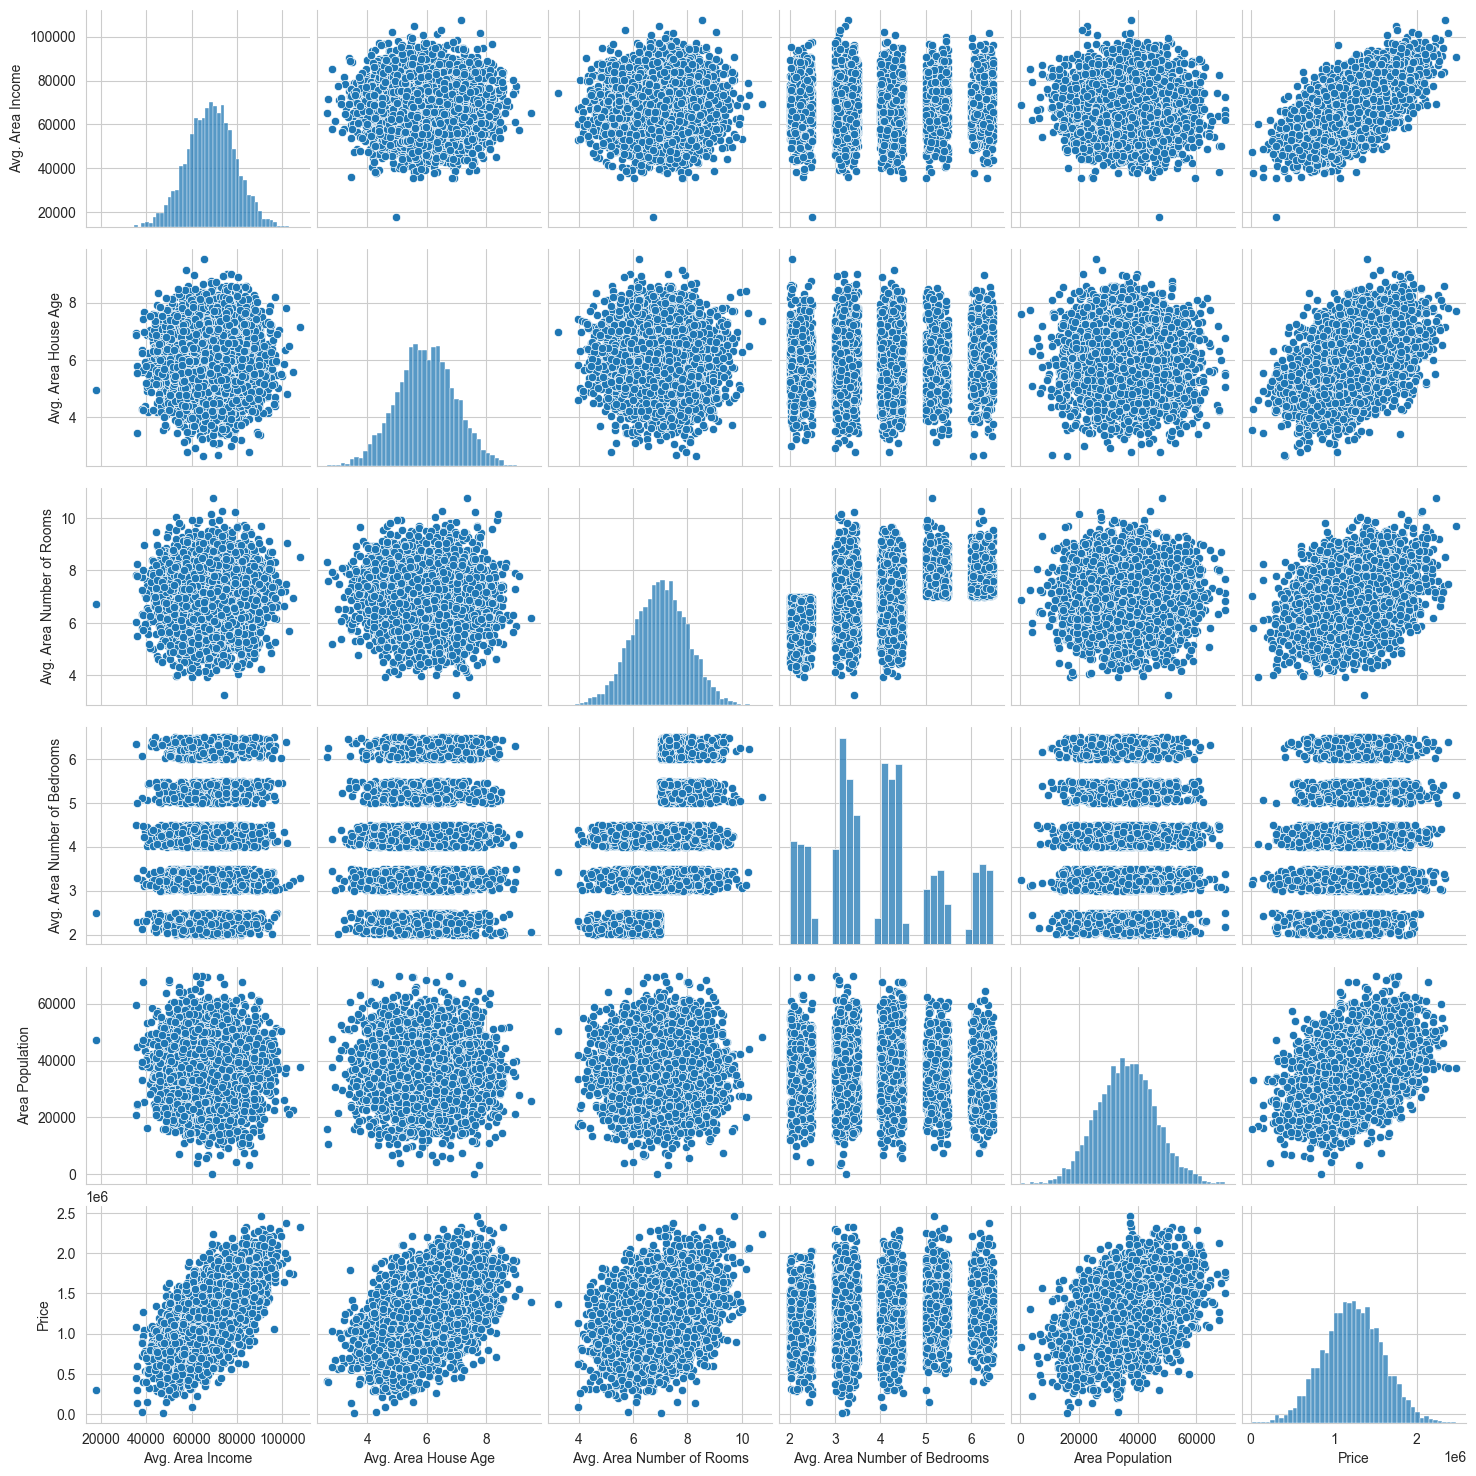

In [5]:
sns.pairplot(USA_Housing);

## **Distribución de Precios de Viviendas en Estados Unidos**

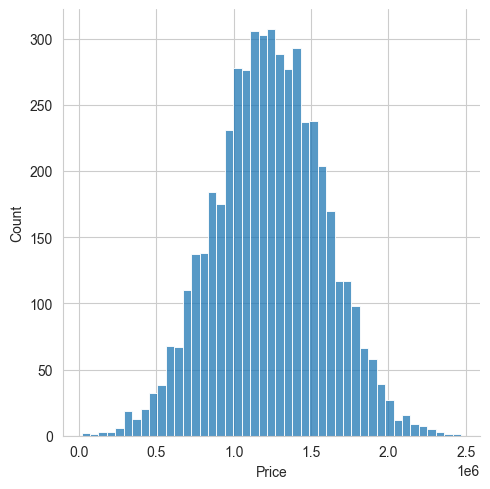

In [6]:
sns.displot(USA_Housing['Price']);

In [7]:
#Displaying correlation among all the columns 
USA_Housing.corr(numeric_only=True)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


## **Mostrando la correlación entre todas las columnas usando un Mapa de Calor**

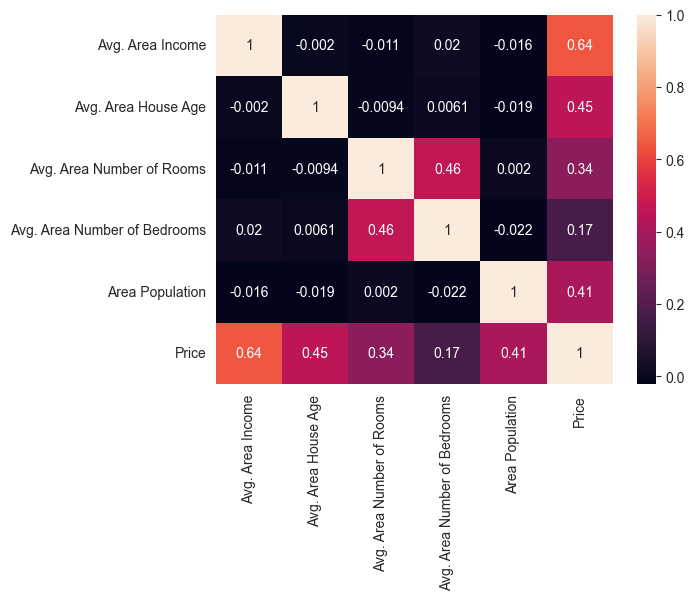

In [8]:
sns.heatmap(USA_Housing.corr(numeric_only=True), annot=True);

## **Entrenando un Modelo de Regresión Lineal**

[](http://)Primero necesitaremos dividir nuestros datos en un array X que contenga las características para entrenar, y un array y con la variable objetivo, en este caso la columna Price. Descartaremos la columna Address porque solo tiene información de texto que el modelo de regresión lineal no puede usar.

### Arrays X e y



La fórmula es:

\[
y = a + b_1 X_1 + b_2 X_2
\]

### Explicación de cada término
- **\(y\)** → variable dependiente, lo que queremos predecir.  
- **\(a\)** → intercepto, el valor de \(y\) cuando \(X_1 = 0\) y \(X_2 = 0\).  
- **\(b_1\)** → coeficiente de \(X_1\). Indica cuánto cambia \(y\) si \(X_1\) aumenta en 1 unidad, manteniendo \(X_2\) fijo.  
- **\(b_2\)** → coeficiente de \(X_2\). Indica cuánto cambia \(y\) si \(X_2\) aumenta en 1 unidad, manteniendo \(X_1\) fijo.  
- **\(X_1, X_2\)** → variables independientes o explicativas.  

### Interpretación
Esta es una **regresión lineal múltiple** con dos variables.  
Sirve para modelar situaciones donde el resultado depende de más de un factor.  

**Ejemplo práctico:**  
- \(y\) = precio de una casa  
- \(X_1\) = tamaño en m²  
- \(X_2\) = número de habitaciones  
- Cada coeficiente indica cuánto aporta cada característica al precio.


In [9]:
#Getting all Coulmn names
USA_Housing.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [10]:
# Columns as Features
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [11]:
# Price is my Target Variable, what we trying to predict
y = USA_Housing['Price']
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 5000, dtype: float64

## **Entrenando el Modelo**

Ahora que hemos explorado un poco los datos, vamos a proceder a dividir los datos en conjuntos de entrenamiento y prueba.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [13]:
print("Total features shape:", X.shape)
print("Train features shape:", X_train.shape)
print("Train target shape:", y_train.shape)
print("Test features shape:", X_test.shape)
print("Test target shape:", y_test.shape)

Total features shape: (5000, 5)
Train features shape: (3500, 5)
Train target shape: (3500,)
Test features shape: (1500, 5)
Test target shape: (1500,)


In [14]:
#importing the Linear Regression Algorithm
from sklearn.linear_model import LinearRegression

In [15]:
#creating LinearRegression Object
lm = LinearRegression()

In [16]:
#Training the Data Model
lm.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


 ## **Evaluación del Modelo**


Evaluemos el modelo verificando sus coeficientes 

y = a + bX1 + cX2 + dX3 + eX4 + fX5

Precio = -2638673 + 21.6*Ingreso Promedio + ......

In [17]:
print(lm.intercept_) #lm.intercept obtienes el valor de **a** (intercepto). 

-2638673.4261914166


El intercepto (también llamado término independiente o bias) es el valor de 
𝑦
y cuando todas las variables 
𝑋
1
,
𝑋
2
,
𝑋
3
,
𝑋
4
,
𝑋
5
X
1
	​

,X
2
	​

,X
3
	​

,X
4
	​

,X
5
	​

 son cero.

En esta ecuación, el intercepto es el coeficiente 
𝑎
a.

In [18]:
print(lm.coef_) #lm.coef obtienes los coeficientes asociados a cada variable independiente.  

[2.16257989e+01 1.65590393e+05 1.19827783e+05 2.36109526e+03
 1.52165814e+01]


b, c, d, e, f
Coeficientes o pesos (weights)
Miden cuánto influye cada variable X en la salida y.
Cuanto mayor es el número, más peso tiene esa variable.

In [19]:
coeff_df = pd.DataFrame(lm.coef_,
                        X.columns,
                        columns=['Coefficient'])
coeff_df

,Coefficient
Avg. Area Income,21.625799
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Area Population,15.216581


**Interpretando los coeficientes:**

- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Ingreso Promedio del Área** está asociado con un **aumento de \$21.62**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Edad Promedio de las Casas del Área** está asociado con un **aumento de \$165590.39**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Número Promedio de Habitaciones del Área** está asociado con un **aumento de \$119827.78**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Número Promedio de Dormitorios del Área** está asociado con un **aumento de \$2361.09**.
- Manteniendo todas las demás características fijas, un aumento de 1 unidad en **Población del Área** está asociado con un **aumento de \$15.21**.

## **Predicciones de nuestro Modelo**

¡Vamos a obtener predicciones de nuestro conjunto de prueba y ver qué tan bien funcionó!

In [20]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
1501,61907.593345,7.017838,6.440256,3.25,43828.947207
2586,57160.202243,6.893260,6.921532,3.13,43467.147035
2653,70190.796445,6.745054,6.662567,2.01,29215.136112
1055,69316.796889,6.300409,7.873576,4.28,24448.211461
705,72991.481649,3.412866,6.494081,2.48,50626.495426
...,...,...,...,...,...
3563,74208.124644,6.259782,8.666717,3.38,25507.336340
1538,71112.350296,5.612677,7.419542,4.26,24134.413996
1837,63665.394418,6.729105,7.732959,3.43,44029.681816
2380,56073.892443,6.576733,6.959056,4.40,64149.680213


In [21]:
# Usamos el modelo entrenado (lm) para hacer predicciones
predictions = lm.predict(X_test)
predictions

array([1308536.13592619, 1237122.72746475, 1243835.62817066, ...,
       1457119.79297241, 1483428.95309368, 1047510.59737176],
      shape=(1500,))

In [ ]:
# Predicciones con un modelo de Regresión Lineal

# Usamos el modelo entrenado para predecir sobre los datos de prueba
#predictions = lm.predict(X_test)
#predictions

# Salida esperada (ejemplo):
# array([1308536.13592619, 1237122.72746475, 1243835.62817066, ...,
#        1457119.79297241, 1483428.95309368, 1047510.59737176],
#       shape=(1500,))

# -------------------------
# ¿Qué significa?
# - Es un array de NumPy con las predicciones de la variable dependiente (y).
# - Cada número corresponde al valor estimado para una observación de X_test.
# - shape=(1500,) indica que el modelo generó 1500 predicciones.
#
# Ejemplo de interpretación (si el modelo predice precios de viviendas):
# 1308536.13 → primera vivienda ≈ 1,308,536
# 1237122.72 → segunda vivienda ≈ 1,237,122
# 1243835.62 → tercera vivienda ≈ 1,243,835
# … y así hasta completar las 1500 predicciones.
#
# ✅ Estas predicciones luego se comparan con los valores reales de prueba
#    para evaluar el desempeño del modelo (ej: R² o error cuadrático medio).


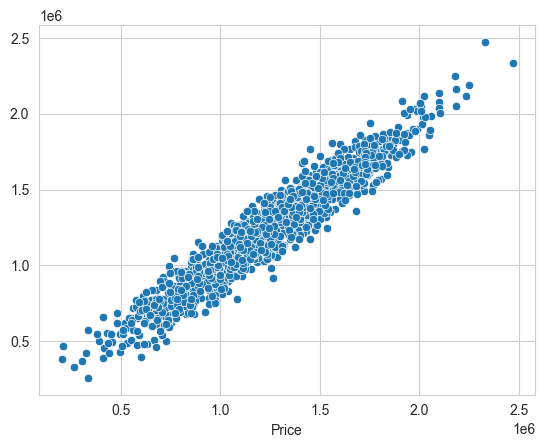

In [22]:
sns.scatterplot(x = y_test, y = predictions);

In [23]:
new_home = np.array([[100000, 20, 8, 9, 100000],
                    [200000, 40, 16, 18, 110000]])

lm.predict(new_home)

c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([ 5337244.58691838, 11943670.27444302])

## **Histograma de Residuos**

**Graficando un histograma de los residuos y asegurándonos de que se vea distribuido normalmente.** Si no es así, la regresión lineal no es apropiada para este análisis. La distribución normal de los residuos es una suposición para la Regresión Lineal.

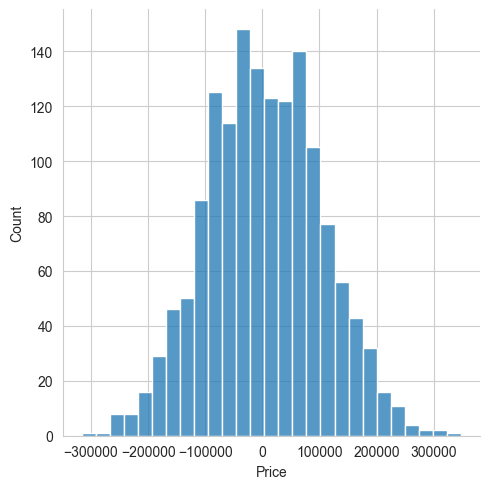

In [24]:
sns.displot((y_test - predictions));

**Calculando el Error Absoluto Medio, Error Cuadrático Medio y el Error Cuadrático Medio de la Raíz**

- **MAE** es el más fácil de entender, porque es el error promedio.
- 
   **Ejemplo:** si el modelo se equivoca en promedio en 20,000 dólares al predecir precios,
   entonces MAE = 20,000.

- **MSE** eleva al cuadrado cada error antes de promediarlo. es más popular que MAE, porque MSE "castiga" errores más grandes, lo cual tiende a ser útil en el mundo real.
- **RMSE** es la raíz cuadrada del MSE, es aún más popular que MSE, porque RMSE es interpretable en las unidades de "y".

Todas estas son **funciones de pérdida**, porque queremos minimizarlas. ¡Un buen modelo tiene valores bajos en todas!

In [25]:
from sklearn import metrics

#R²score mide qué porcentaje de la variabilidad de (y) es explicado por el modelo. cuanto mas cercano a 1 mejor. 
#Ejemplo: R² = 0.85 significa que el modelo explica el 85% de la variabilidad de y.

lm.score(X_test, y_test)

0.9146818498753994

In [26]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('RMSE:', metrics.root_mean_squared_error(y_test, predictions))

MAE: 81135.56609336905
MSE: 10068422551.401144
RMSE: 100341.52954485567
RMSE: 100341.52954485567


## Importancia de las características

In [27]:
intercept = lm.intercept_
features = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
features.head().sort_values('coefficient', ascending=False)

,coefficient
Avg. Area House Age,165590.392746
Avg. Area Number of Rooms,119827.783390
Avg. Area Number of Bedrooms,2361.095262
Avg. Area Income,21.625799
Area Population,15.216581


y = w1.X1 + w2.X2 + w3.X3

Una habitación extra aumenta el precio (Y) en 2300, y un dólar extra en el ingreso del área aumenta el precio en 21. Este es el significado de los coeficientes, pero **¿significa esto que el número de dormitorios es mucho más importante que el ingreso del área?**

Absolutamente no. Debes estandarizar los coeficientes para entender mejor la importancia de cada uno.

In [ ]:
# X_train_scal

In [28]:
# Importamos el módulo de preprocesamiento de scikit-learn
from sklearn import preprocessing

# Creamos un objeto StandardScaler
# Este scaler estandariza los datos:
#   - Media = 0
#   - Desviación estándar = 1
scaler = preprocessing.StandardScaler()

# Ajustamos el scaler a los datos de entrenamiento (X_train)
# Aquí calcula la media y desviación estándar de cada columna
scaler.fit(X_train)

# Transformamos los datos de entrenamiento usando esas medias y desviaciones
# Ahora X_train_scal son los mismos datos pero estandarizados
X_train_scal = scaler.transform(X_train)

# Creamos un modelo de regresión lineal
lm_scal = LinearRegression()

# Entrenamos el modelo con los datos estandarizados
lm_scal.fit(X_train_scal, y_train)

# Guardamos el intercepto del modelo entrenado
intercept_scal = lm_scal.intercept_

# Creamos un DataFrame para ver los coeficientes de cada variable
# Cada coeficiente ahora es comparable porque todas las variables
# están en la misma escala (media=0, std=1)
features_std = pd.DataFrame(lm_scal.coef_, X_train.columns, columns=['coefficient'])

# Ordenamos las variables de mayor a menor según su coeficiente
features_std.sort_values('coefficient', ascending=False)


,coefficient
Avg. Area Income,232679.724643
Avg. Area House Age,163841.046593
Area Population,151252.342377
Avg. Area Number of Rooms,121110.555478
Avg. Area Number of Bedrooms,2892.815119


MAE: 81135.56609336878
MSE: 10068422551.40088
RMSE: 100341.52954485436


c:\Users\borja\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


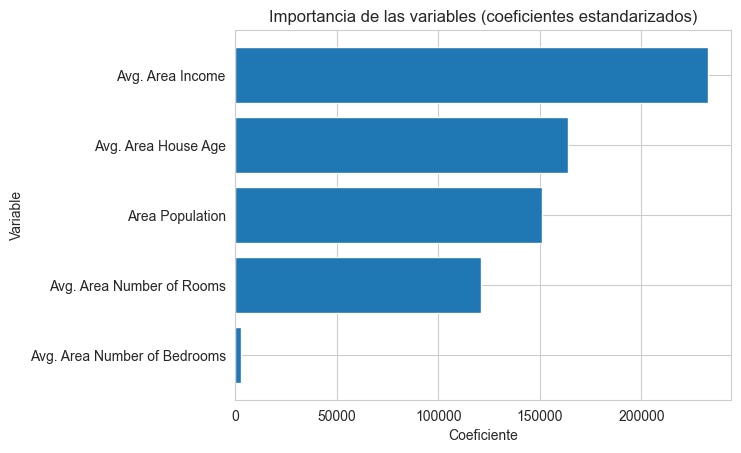

In [29]:
# Revisamos cómo se ve la primera fila de los datos de entrenamiento ya escalados
X_train_scal[0:1] 

# Revisamos cómo se ve la primera fila de los datos de prueba en su forma original (sin escalar)
X_test[0:1]

# Transformamos la primera fila de prueba con el scaler (es decir, la estandarizamos)
# Esto es necesario porque el modelo fue entrenado con datos escalados
scaler.transform(X_test[0:1])

# Usamos el modelo entrenado con datos escalados para hacer predicciones
# IMPORTANTE: siempre debemos transformar (escalar) los datos antes de predecir
predictions = lm_scal.predict(scaler.transform(X_test))

# Calculamos las métricas de error para evaluar el desempeño del modelo
print('MAE:', metrics.mean_absolute_error(y_test, predictions))   # Error absoluto medio
print('MSE:', metrics.mean_squared_error(y_test, predictions))    # Error cuadrático medio
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))  # Raíz del error cuadrático medio

# Creamos un nuevo ejemplo con 5 variables (Ingreso, Edad casa, Nº de cuartos, Nº de dormitorios, Población)
X_new = [[60000, 5, 3, 2, 10000]]

# Lo escalamos y pedimos al modelo que prediga el precio
lm_scal.predict(scaler.transform(X_new))

# Mostramos un resumen estadístico del dataset (media, desviación, mínimos, máximos, cuartiles, etc.)
USA_Housing.describe()

# -----------------------------
# Visualización de los coeficientes estandarizados
import matplotlib.pyplot as plt

# Ordenamos los coeficientes de menor a mayor para graficarlos de forma clara
features_std = features_std.sort_values('coefficient', ascending=True)

# Creamos un gráfico de barras horizontales
plt.barh(features_std.index, features_std.coefficient)
plt.title("Importancia de las variables (coeficientes estandarizados)")
plt.xlabel("Coeficiente")
plt.ylabel("Variable")
plt.show()


## Eliminando ruido
Probemos un nuevo modelo sin el `Número Promedio de Dormitorios del Área`

In [30]:
y_test.shape

(1500,)

In [31]:
from sklearn import metrics

In [43]:
X = USA_Housing[['Avg. Area Income', 'Avg. Area House Age',
                 'Avg. Area Number of Rooms', 'Area Population']]

y = USA_Housing['Price']


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

lm = LinearRegression(n_jobs=-1) 
lm.fit(X_train, y_train)

predictions = lm.predict(X_test)
predictions

# A little bit lower without Avg. Area Number of Bedrooms
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 81116.43361053789
MSE: 10062092569.298914
RMSE: 100309.98240104977


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population
1501,61907.593345,7.017838,6.440256,43828.947207
2586,57160.202243,6.893260,6.921532,43467.147035
2653,70190.796445,6.745054,6.662567,29215.136112
1055,69316.796889,6.300409,7.873576,24448.211461
705,72991.481649,3.412866,6.494081,50626.495426
...,...,...,...,...
3563,74208.124644,6.259782,8.666717,25507.336340
1538,71112.350296,5.612677,7.419542,24134.413996
1837,63665.394418,6.729105,7.732959,44029.681816
2380,56073.892443,6.576733,6.959056,64149.680213


In [ ]:
# metrics.mean_absolute_percentage_error()